In [2]:
from pydoc import describe
from pyexpat import features
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

diabetes=load_diabetes()
x = diabetes.data
y = diabetes.target


In [3]:
y = diabetes.target #이미 어레이임!

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [5]:
W = np.random.rand(10)
b = np.random.rand()


def model(x, W, b):
    predictions = 0
    for i in range(10):
        predictions += x[:, i] * W[i]
    predictions += b
    return predictions

In [6]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(x, W, b, y):
    predictions = model(x, W, b)
    L = MSE(predictions, y)
    return L

In [7]:
def gradient(x, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(x, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * x.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

dW, db = gradient(x, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.44207494  -13.82119749 -189.52882856 -142.56620127  -68.13671525
  -55.92422092  127.75843226 -139.01844236 -182.78769216 -123.43556187]
db: -302.8219962003974


In [8]:
LEARNING_RATE = 0.1

#(9) 모델 학습하기
losses = []

for i in range(1, 50000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 10 : Loss 4692.6381
Iteration 20 : Loss 3824.5408
Iteration 30 : Loss 3526.3651
Iteration 40 : Loss 3356.1327
Iteration 50 : Loss 3246.1178
Iteration 60 : Loss 3170.0588
Iteration 70 : Loss 3115.5419
Iteration 80 : Loss 3075.6921
Iteration 90 : Loss 3046.2172
Iteration 100 : Loss 3024.2325
Iteration 110 : Loss 3007.7208
Iteration 120 : Loss 2995.2401
Iteration 130 : Loss 2985.7479
Iteration 140 : Loss 2978.4836
Iteration 150 : Loss 2972.8895
Iteration 160 : Loss 2968.5540
Iteration 170 : Loss 2965.1722
Iteration 180 : Loss 2962.5168
Iteration 190 : Loss 2960.4176
Iteration 200 : Loss 2958.7465
Iteration 210 : Loss 2957.4067
Iteration 220 : Loss 2956.3247
Iteration 230 : Loss 2955.4442
Iteration 240 : Loss 2954.7220
Iteration 250 : Loss 2954.1249
Iteration 260 : Loss 2953.6270
Iteration 270 : Loss 2953.2082
Iteration 280 : Loss 2952.8529
Iteration 290 : Loss 2952.5485
Iteration 300 : Loss 2952.2853
Iteration 310 : Loss 2952.0555
Iteration 320 : Loss 2951.8530
Iteration 330 : L

Iteration 4550 : Loss 2932.7522
Iteration 4560 : Loss 2932.7288
Iteration 4570 : Loss 2932.7056
Iteration 4580 : Loss 2932.6824
Iteration 4590 : Loss 2932.6592
Iteration 4600 : Loss 2932.6362
Iteration 4610 : Loss 2932.6132
Iteration 4620 : Loss 2932.5902
Iteration 4630 : Loss 2932.5673
Iteration 4640 : Loss 2932.5445
Iteration 4650 : Loss 2932.5217
Iteration 4660 : Loss 2932.4990
Iteration 4670 : Loss 2932.4764
Iteration 4680 : Loss 2932.4538
Iteration 4690 : Loss 2932.4313
Iteration 4700 : Loss 2932.4088
Iteration 4710 : Loss 2932.3864
Iteration 4720 : Loss 2932.3641
Iteration 4730 : Loss 2932.3418
Iteration 4740 : Loss 2932.3196
Iteration 4750 : Loss 2932.2974
Iteration 4760 : Loss 2932.2753
Iteration 4770 : Loss 2932.2533
Iteration 4780 : Loss 2932.2313
Iteration 4790 : Loss 2932.2093
Iteration 4800 : Loss 2932.1875
Iteration 4810 : Loss 2932.1657
Iteration 4820 : Loss 2932.1439
Iteration 4830 : Loss 2932.1222
Iteration 4840 : Loss 2932.1006
Iteration 4850 : Loss 2932.0790
Iteratio

Iteration 9380 : Loss 2926.4294
Iteration 9390 : Loss 2926.4230
Iteration 9400 : Loss 2926.4166
Iteration 9410 : Loss 2926.4103
Iteration 9420 : Loss 2926.4039
Iteration 9430 : Loss 2926.3976
Iteration 9440 : Loss 2926.3913
Iteration 9450 : Loss 2926.3850
Iteration 9460 : Loss 2926.3788
Iteration 9470 : Loss 2926.3725
Iteration 9480 : Loss 2926.3663
Iteration 9490 : Loss 2926.3601
Iteration 9500 : Loss 2926.3539
Iteration 9510 : Loss 2926.3477
Iteration 9520 : Loss 2926.3415
Iteration 9530 : Loss 2926.3354
Iteration 9540 : Loss 2926.3293
Iteration 9550 : Loss 2926.3231
Iteration 9560 : Loss 2926.3171
Iteration 9570 : Loss 2926.3110
Iteration 9580 : Loss 2926.3049
Iteration 9590 : Loss 2926.2989
Iteration 9600 : Loss 2926.2928
Iteration 9610 : Loss 2926.2868
Iteration 9620 : Loss 2926.2808
Iteration 9630 : Loss 2926.2748
Iteration 9640 : Loss 2926.2688
Iteration 9650 : Loss 2926.2629
Iteration 9660 : Loss 2926.2570
Iteration 9670 : Loss 2926.2510
Iteration 9680 : Loss 2926.2451
Iteratio

Iteration 13670 : Loss 2924.8003
Iteration 13680 : Loss 2924.7983
Iteration 13690 : Loss 2924.7963
Iteration 13700 : Loss 2924.7943
Iteration 13710 : Loss 2924.7923
Iteration 13720 : Loss 2924.7903
Iteration 13730 : Loss 2924.7883
Iteration 13740 : Loss 2924.7863
Iteration 13750 : Loss 2924.7843
Iteration 13760 : Loss 2924.7824
Iteration 13770 : Loss 2924.7804
Iteration 13780 : Loss 2924.7784
Iteration 13790 : Loss 2924.7765
Iteration 13800 : Loss 2924.7745
Iteration 13810 : Loss 2924.7726
Iteration 13820 : Loss 2924.7706
Iteration 13830 : Loss 2924.7687
Iteration 13840 : Loss 2924.7667
Iteration 13850 : Loss 2924.7648
Iteration 13860 : Loss 2924.7629
Iteration 13870 : Loss 2924.7610
Iteration 13880 : Loss 2924.7590
Iteration 13890 : Loss 2924.7571
Iteration 13900 : Loss 2924.7552
Iteration 13910 : Loss 2924.7533
Iteration 13920 : Loss 2924.7514
Iteration 13930 : Loss 2924.7495
Iteration 13940 : Loss 2924.7477
Iteration 13950 : Loss 2924.7458
Iteration 13960 : Loss 2924.7439
Iteration 

Iteration 16430 : Loss 2924.4060
Iteration 16440 : Loss 2924.4050
Iteration 16450 : Loss 2924.4041
Iteration 16460 : Loss 2924.4031
Iteration 16470 : Loss 2924.4021
Iteration 16480 : Loss 2924.4012
Iteration 16490 : Loss 2924.4002
Iteration 16500 : Loss 2924.3993
Iteration 16510 : Loss 2924.3983
Iteration 16520 : Loss 2924.3974
Iteration 16530 : Loss 2924.3965
Iteration 16540 : Loss 2924.3955
Iteration 16550 : Loss 2924.3946
Iteration 16560 : Loss 2924.3937
Iteration 16570 : Loss 2924.3927
Iteration 16580 : Loss 2924.3918
Iteration 16590 : Loss 2924.3909
Iteration 16600 : Loss 2924.3899
Iteration 16610 : Loss 2924.3890
Iteration 16620 : Loss 2924.3881
Iteration 16630 : Loss 2924.3872
Iteration 16640 : Loss 2924.3863
Iteration 16650 : Loss 2924.3854
Iteration 16660 : Loss 2924.3845
Iteration 16670 : Loss 2924.3836
Iteration 16680 : Loss 2924.3827
Iteration 16690 : Loss 2924.3818
Iteration 16700 : Loss 2924.3809
Iteration 16710 : Loss 2924.3800
Iteration 16720 : Loss 2924.3791
Iteration 

Iteration 19070 : Loss 2924.2235
Iteration 19080 : Loss 2924.2230
Iteration 19090 : Loss 2924.2225
Iteration 19100 : Loss 2924.2221
Iteration 19110 : Loss 2924.2216
Iteration 19120 : Loss 2924.2211
Iteration 19130 : Loss 2924.2207
Iteration 19140 : Loss 2924.2202
Iteration 19150 : Loss 2924.2197
Iteration 19160 : Loss 2924.2193
Iteration 19170 : Loss 2924.2188
Iteration 19180 : Loss 2924.2183
Iteration 19190 : Loss 2924.2179
Iteration 19200 : Loss 2924.2174
Iteration 19210 : Loss 2924.2170
Iteration 19220 : Loss 2924.2165
Iteration 19230 : Loss 2924.2161
Iteration 19240 : Loss 2924.2156
Iteration 19250 : Loss 2924.2151
Iteration 19260 : Loss 2924.2147
Iteration 19270 : Loss 2924.2142
Iteration 19280 : Loss 2924.2138
Iteration 19290 : Loss 2924.2133
Iteration 19300 : Loss 2924.2129
Iteration 19310 : Loss 2924.2125
Iteration 19320 : Loss 2924.2120
Iteration 19330 : Loss 2924.2116
Iteration 19340 : Loss 2924.2111
Iteration 19350 : Loss 2924.2107
Iteration 19360 : Loss 2924.2102
Iteration 

Iteration 21820 : Loss 2924.1311
Iteration 21830 : Loss 2924.1309
Iteration 21840 : Loss 2924.1306
Iteration 21850 : Loss 2924.1304
Iteration 21860 : Loss 2924.1302
Iteration 21870 : Loss 2924.1300
Iteration 21880 : Loss 2924.1297
Iteration 21890 : Loss 2924.1295
Iteration 21900 : Loss 2924.1293
Iteration 21910 : Loss 2924.1291
Iteration 21920 : Loss 2924.1288
Iteration 21930 : Loss 2924.1286
Iteration 21940 : Loss 2924.1284
Iteration 21950 : Loss 2924.1282
Iteration 21960 : Loss 2924.1280
Iteration 21970 : Loss 2924.1277
Iteration 21980 : Loss 2924.1275
Iteration 21990 : Loss 2924.1273
Iteration 22000 : Loss 2924.1271
Iteration 22010 : Loss 2924.1269
Iteration 22020 : Loss 2924.1267
Iteration 22030 : Loss 2924.1264
Iteration 22040 : Loss 2924.1262
Iteration 22050 : Loss 2924.1260
Iteration 22060 : Loss 2924.1258
Iteration 22070 : Loss 2924.1256
Iteration 22080 : Loss 2924.1254
Iteration 22090 : Loss 2924.1252
Iteration 22100 : Loss 2924.1250
Iteration 22110 : Loss 2924.1247
Iteration 

Iteration 24470 : Loss 2924.0880
Iteration 24480 : Loss 2924.0879
Iteration 24490 : Loss 2924.0878
Iteration 24500 : Loss 2924.0877
Iteration 24510 : Loss 2924.0875
Iteration 24520 : Loss 2924.0874
Iteration 24530 : Loss 2924.0873
Iteration 24540 : Loss 2924.0872
Iteration 24550 : Loss 2924.0871
Iteration 24560 : Loss 2924.0870
Iteration 24570 : Loss 2924.0869
Iteration 24580 : Loss 2924.0868
Iteration 24590 : Loss 2924.0867
Iteration 24600 : Loss 2924.0866
Iteration 24610 : Loss 2924.0865
Iteration 24620 : Loss 2924.0863
Iteration 24630 : Loss 2924.0862
Iteration 24640 : Loss 2924.0861
Iteration 24650 : Loss 2924.0860
Iteration 24660 : Loss 2924.0859
Iteration 24670 : Loss 2924.0858
Iteration 24680 : Loss 2924.0857
Iteration 24690 : Loss 2924.0856
Iteration 24700 : Loss 2924.0855
Iteration 24710 : Loss 2924.0854
Iteration 24720 : Loss 2924.0853
Iteration 24730 : Loss 2924.0852
Iteration 24740 : Loss 2924.0851
Iteration 24750 : Loss 2924.0850
Iteration 24760 : Loss 2924.0849
Iteration 

Iteration 27100 : Loss 2924.0669
Iteration 27110 : Loss 2924.0669
Iteration 27120 : Loss 2924.0668
Iteration 27130 : Loss 2924.0668
Iteration 27140 : Loss 2924.0667
Iteration 27150 : Loss 2924.0667
Iteration 27160 : Loss 2924.0666
Iteration 27170 : Loss 2924.0665
Iteration 27180 : Loss 2924.0665
Iteration 27190 : Loss 2924.0664
Iteration 27200 : Loss 2924.0664
Iteration 27210 : Loss 2924.0663
Iteration 27220 : Loss 2924.0663
Iteration 27230 : Loss 2924.0662
Iteration 27240 : Loss 2924.0662
Iteration 27250 : Loss 2924.0661
Iteration 27260 : Loss 2924.0661
Iteration 27270 : Loss 2924.0660
Iteration 27280 : Loss 2924.0660
Iteration 27290 : Loss 2924.0659
Iteration 27300 : Loss 2924.0659
Iteration 27310 : Loss 2924.0658
Iteration 27320 : Loss 2924.0658
Iteration 27330 : Loss 2924.0657
Iteration 27340 : Loss 2924.0656
Iteration 27350 : Loss 2924.0656
Iteration 27360 : Loss 2924.0655
Iteration 27370 : Loss 2924.0655
Iteration 27380 : Loss 2924.0654
Iteration 27390 : Loss 2924.0654
Iteration 

Iteration 29780 : Loss 2924.0564
Iteration 29790 : Loss 2924.0564
Iteration 29800 : Loss 2924.0563
Iteration 29810 : Loss 2924.0563
Iteration 29820 : Loss 2924.0563
Iteration 29830 : Loss 2924.0563
Iteration 29840 : Loss 2924.0562
Iteration 29850 : Loss 2924.0562
Iteration 29860 : Loss 2924.0562
Iteration 29870 : Loss 2924.0562
Iteration 29880 : Loss 2924.0561
Iteration 29890 : Loss 2924.0561
Iteration 29900 : Loss 2924.0561
Iteration 29910 : Loss 2924.0560
Iteration 29920 : Loss 2924.0560
Iteration 29930 : Loss 2924.0560
Iteration 29940 : Loss 2924.0560
Iteration 29950 : Loss 2924.0559
Iteration 29960 : Loss 2924.0559
Iteration 29970 : Loss 2924.0559
Iteration 29980 : Loss 2924.0559
Iteration 29990 : Loss 2924.0558
Iteration 30000 : Loss 2924.0558
Iteration 30010 : Loss 2924.0558
Iteration 30020 : Loss 2924.0558
Iteration 30030 : Loss 2924.0557
Iteration 30040 : Loss 2924.0557
Iteration 30050 : Loss 2924.0557
Iteration 30060 : Loss 2924.0557
Iteration 30070 : Loss 2924.0556
Iteration 

Iteration 34670 : Loss 2924.0491
Iteration 34680 : Loss 2924.0491
Iteration 34690 : Loss 2924.0491
Iteration 34700 : Loss 2924.0491
Iteration 34710 : Loss 2924.0490
Iteration 34720 : Loss 2924.0490
Iteration 34730 : Loss 2924.0490
Iteration 34740 : Loss 2924.0490
Iteration 34750 : Loss 2924.0490
Iteration 34760 : Loss 2924.0490
Iteration 34770 : Loss 2924.0490
Iteration 34780 : Loss 2924.0490
Iteration 34790 : Loss 2924.0490
Iteration 34800 : Loss 2924.0490
Iteration 34810 : Loss 2924.0490
Iteration 34820 : Loss 2924.0490
Iteration 34830 : Loss 2924.0490
Iteration 34840 : Loss 2924.0490
Iteration 34850 : Loss 2924.0489
Iteration 34860 : Loss 2924.0489
Iteration 34870 : Loss 2924.0489
Iteration 34880 : Loss 2924.0489
Iteration 34890 : Loss 2924.0489
Iteration 34900 : Loss 2924.0489
Iteration 34910 : Loss 2924.0489
Iteration 34920 : Loss 2924.0489
Iteration 34930 : Loss 2924.0489
Iteration 34940 : Loss 2924.0489
Iteration 34950 : Loss 2924.0489
Iteration 34960 : Loss 2924.0489
Iteration 

Iteration 38850 : Loss 2924.0473
Iteration 38860 : Loss 2924.0473
Iteration 38870 : Loss 2924.0473
Iteration 38880 : Loss 2924.0473
Iteration 38890 : Loss 2924.0472
Iteration 38900 : Loss 2924.0472
Iteration 38910 : Loss 2924.0472
Iteration 38920 : Loss 2924.0472
Iteration 38930 : Loss 2924.0472
Iteration 38940 : Loss 2924.0472
Iteration 38950 : Loss 2924.0472
Iteration 38960 : Loss 2924.0472
Iteration 38970 : Loss 2924.0472
Iteration 38980 : Loss 2924.0472
Iteration 38990 : Loss 2924.0472
Iteration 39000 : Loss 2924.0472
Iteration 39010 : Loss 2924.0472
Iteration 39020 : Loss 2924.0472
Iteration 39030 : Loss 2924.0472
Iteration 39040 : Loss 2924.0472
Iteration 39050 : Loss 2924.0472
Iteration 39060 : Loss 2924.0472
Iteration 39070 : Loss 2924.0472
Iteration 39080 : Loss 2924.0472
Iteration 39090 : Loss 2924.0472
Iteration 39100 : Loss 2924.0472
Iteration 39110 : Loss 2924.0472
Iteration 39120 : Loss 2924.0472
Iteration 39130 : Loss 2924.0472
Iteration 39140 : Loss 2924.0472
Iteration 

Iteration 41480 : Loss 2924.0468
Iteration 41490 : Loss 2924.0468
Iteration 41500 : Loss 2924.0468
Iteration 41510 : Loss 2924.0468
Iteration 41520 : Loss 2924.0468
Iteration 41530 : Loss 2924.0468
Iteration 41540 : Loss 2924.0468
Iteration 41550 : Loss 2924.0468
Iteration 41560 : Loss 2924.0468
Iteration 41570 : Loss 2924.0468
Iteration 41580 : Loss 2924.0468
Iteration 41590 : Loss 2924.0468
Iteration 41600 : Loss 2924.0468
Iteration 41610 : Loss 2924.0468
Iteration 41620 : Loss 2924.0468
Iteration 41630 : Loss 2924.0468
Iteration 41640 : Loss 2924.0468
Iteration 41650 : Loss 2924.0468
Iteration 41660 : Loss 2924.0468
Iteration 41670 : Loss 2924.0468
Iteration 41680 : Loss 2924.0468
Iteration 41690 : Loss 2924.0468
Iteration 41700 : Loss 2924.0468
Iteration 41710 : Loss 2924.0468
Iteration 41720 : Loss 2924.0468
Iteration 41730 : Loss 2924.0468
Iteration 41740 : Loss 2924.0468
Iteration 41750 : Loss 2924.0468
Iteration 41760 : Loss 2924.0468
Iteration 41770 : Loss 2924.0468
Iteration 

Iteration 44050 : Loss 2924.0466
Iteration 44060 : Loss 2924.0466
Iteration 44070 : Loss 2924.0466
Iteration 44080 : Loss 2924.0466
Iteration 44090 : Loss 2924.0466
Iteration 44100 : Loss 2924.0466
Iteration 44110 : Loss 2924.0466
Iteration 44120 : Loss 2924.0466
Iteration 44130 : Loss 2924.0466
Iteration 44140 : Loss 2924.0466
Iteration 44150 : Loss 2924.0466
Iteration 44160 : Loss 2924.0466
Iteration 44170 : Loss 2924.0466
Iteration 44180 : Loss 2924.0466
Iteration 44190 : Loss 2924.0466
Iteration 44200 : Loss 2924.0466
Iteration 44210 : Loss 2924.0466
Iteration 44220 : Loss 2924.0466
Iteration 44230 : Loss 2924.0466
Iteration 44240 : Loss 2924.0466
Iteration 44250 : Loss 2924.0466
Iteration 44260 : Loss 2924.0466
Iteration 44270 : Loss 2924.0466
Iteration 44280 : Loss 2924.0466
Iteration 44290 : Loss 2924.0466
Iteration 44300 : Loss 2924.0466
Iteration 44310 : Loss 2924.0466
Iteration 44320 : Loss 2924.0466
Iteration 44330 : Loss 2924.0466
Iteration 44340 : Loss 2924.0466
Iteration 

Iteration 46640 : Loss 2924.0465
Iteration 46650 : Loss 2924.0465
Iteration 46660 : Loss 2924.0465
Iteration 46670 : Loss 2924.0465
Iteration 46680 : Loss 2924.0465
Iteration 46690 : Loss 2924.0465
Iteration 46700 : Loss 2924.0465
Iteration 46710 : Loss 2924.0465
Iteration 46720 : Loss 2924.0465
Iteration 46730 : Loss 2924.0465
Iteration 46740 : Loss 2924.0465
Iteration 46750 : Loss 2924.0465
Iteration 46760 : Loss 2924.0465
Iteration 46770 : Loss 2924.0465
Iteration 46780 : Loss 2924.0465
Iteration 46790 : Loss 2924.0465
Iteration 46800 : Loss 2924.0465
Iteration 46810 : Loss 2924.0465
Iteration 46820 : Loss 2924.0465
Iteration 46830 : Loss 2924.0465
Iteration 46840 : Loss 2924.0465
Iteration 46850 : Loss 2924.0465
Iteration 46860 : Loss 2924.0465
Iteration 46870 : Loss 2924.0465
Iteration 46880 : Loss 2924.0465
Iteration 46890 : Loss 2924.0465
Iteration 46900 : Loss 2924.0465
Iteration 46910 : Loss 2924.0465
Iteration 46920 : Loss 2924.0465
Iteration 46930 : Loss 2924.0465
Iteration 

2821.7433111668597


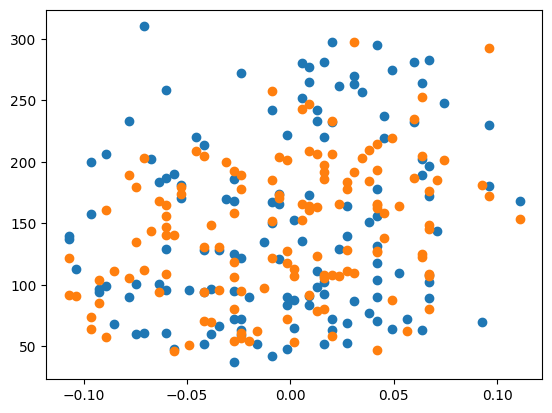

In [9]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(mse)

#(11) 정답 데이터와 예측한 데이터 시각화하기
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()
